In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from PIL import Image

In [2]:
i = 1000

folder = f"Dataset_Student/val/video_{i}/"

In [3]:
mask = np.load(folder + "mask.npy")

In [4]:
img = Image.open(folder + "image_0.png")

print(img.size)

(240, 160)


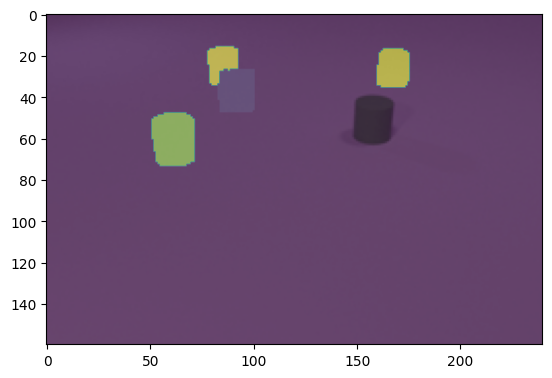

In [5]:
plt.imshow(img)
plt.imshow(mask[21], alpha=0.5)

In [19]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

## We could try computing them ourselves over the data
# These numbers are mean and std values computed over a sample of 500 training samples
normalize = transforms.Normalize(mean=[0.5062, 0.5045, 0.5009],
                                 std=[0.0570, 0.0568, 0.0613])

# Inverse transformation: needed for plotting.
unnormalize = transforms.Normalize(
   mean=[-0.5059/0.0570, -0.5045/0.0568, -0.5011/0.0613],
   std=[1/0.0570, 1/0.0568, 1/0.0613]
)


class VideoDataset(Dataset):
    def __init__(self, root_dir, size, idx_offset=0, has_label=True, num_frames=22):
        self.root_dir = root_dir
        self.size = size
        self.idx_offset = idx_offset
        self.has_label = has_label

        self.num_frames = num_frames

        self.transform = transforms.Compose([
            # Skip some of the other transformations, since we are less worried about
            # scale and color variation
            transforms.ToTensor(),  # convert PIL to Pytorch Tensor
            normalize,
        ])
    
    def __len__(self):
        return self.size

    def __getitem__(self, i):
        img_dir = self.root_dir + f"/video_{self.idx_offset + i}/"

        frames = [Image.open(img_dir + f"image_{j}.png") for j in range(self.num_frames)]
        frames = [self.transform(img) for img in frames]
        frames = torch.stack(frames)
        
        if (self.has_label):
            label = np.load(img_dir + "mask.npy")
            return frames, label

        return frames





In [20]:
dataset = VideoDataset("Dataset_Student/train", 1000, has_label=True)


In [33]:
from matplotlib import animation
from IPython.display import HTML

def plot_video(frames, normalized=True):
    # undo norm and matplot lib wants rgb in last dim
    if (normalized):
        frames = [unnormalize(f).movedim(0, 2).clamp(0, 1) for f in frames]
    
    fig = plt.figure()
    ax = plt.axes()
    def drawframe(i):
        ax.imshow(frames[i])
        
    anim = animation.FuncAnimation(fig, drawframe, frames=len(frames), interval=100)
    
    return HTML(anim.to_html5_video())



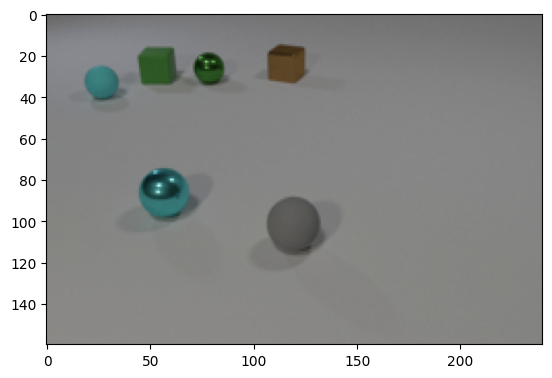

In [34]:
plot_video(dataset[0][0])

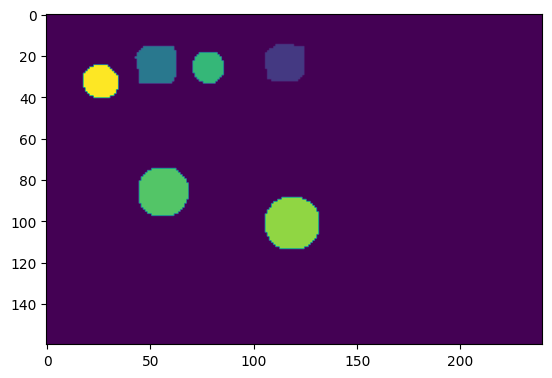

In [35]:
plot_video(dataset[0][1], normalized=False)